<center><span style="font-size:36px;">Анализ гипотез и A/B тестов. </span></center>

# Описание проекта

Нужно приоретизировать гипотезы, подготовленные вместе с маркетинговым отделом. Запустить А/В тесты и проанализировать их результаты.

Проект состоит из двух частей. В каждая часть делиться на задачи:
  * Часть 1. Приоритизация гипотез.
      * Задача
        * Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
        
        * Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
        
        * Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
      
  * Часть 2. Анализ A/B-теста.
  
      * Проанализируйте A/B-тест:
      
        * Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
        
        * Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
        
        * Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
        
        * Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
        
        * Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
        
        * Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
        
        * Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
        
        * Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
        
        * Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
        
        * Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
        
        * Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
        
        * Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
        
        * Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
        
        * Примите решение по результатам теста и объясните его. Варианты решений:
          1. Остановить тест, зафиксировать победу одной из групп.
          2. Остановить тест, зафиксировать отсутствие различий между группами.
          3. Продолжить тест.

## Описание данных

Файл **```hypothesis.csv```**:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    
Файл **```orders.csv```**:

*    transactionId — идентификатор заказа;
*    visitorId — идентификатор пользователя, совершившего заказ;
*    date — дата, когда был совершён заказ;
*    revenue — выручка заказа;
*    group — группа A/B-теста, в которую попал заказ.

Файл **```visitors.csv```**:

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Цели исследования

* выбор и проверка гипотез на A/B тестах.
* принять решение по результатам исследования

# Загрузка данных и подготовка к анализу

In [ ]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [ ]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib
register_matplotlib_converters()

In [ ]:
try:
    visits = pd.read_csv('visitors.csv')
    orders = pd.read_csv('orders.csv')
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [ ]:
# проверим данные
list_0 = [visits, orders]

for i in list_0:
    display(i.head())
    print('')
    i.info()
    print('')
    print(i.duplicated().sum())
    print('')
    print(i.isna().mean())
    print('')

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

0

date        0.0
group       0.0
visitors    0.0
dtype: float64



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

0

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64



### Вывод

В данных нет дубликатов или пропусков.

# Предобработка данных

In [ ]:
visits

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [ ]:
# Преобразуем дату

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# Приоритизация гипотез

В данном шаге определимся с выбором гипотез.

In [ ]:
# уберем сокрашения в датафрейме
pd.set_option('max_colwidth', None)

In [ ]:
# посмотрим какие гипотезы у нас есть
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Фреймворк ICE

In [ ]:
hypothesis['ICE'] = round(hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'], 2)
hypothesis.sort_values(by='ICE',
                       ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Вывод

По методу рассчета приорета ICE, на первом месте на тестирование гипотеза - ```Запустить акцию, дающую скидку на товар в день рождения```

## Фреймворк RICE

In [ ]:
hypothesis['RICE'] = round(hypothesis['Impact']*hypothesis['Confidence']* hypothesis['Reach'] / hypothesis['Efforts'], 2)

In [ ]:
hypothesis.sort_values(by='RICE',
                       ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Вывод

По фрейворку RICE в приорететную гипотезу на тест у нас выпадает - ```Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок```.

### Общий вывод

Проведя небольшое исследование приоретизации гипотез, видно как изменились гипотезы. По ICE первая гипотеза на тест ```Запустить акцию, дающую скидку на товар в день рождения```, а по RICE ```Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок```. Так же, у нас довольно сильно изменились списки гипотез на тест.

Связано это с тем, что фреймворк RICE, при расчет использует дополнительный параметр - охват. Т.е. он включает оценку пользователей, которые увидят изменение.

# Анализ A/B-теста

В перную очередь, посмотрим сколько человек входит в обе группы.

Дата начала и окончания теста.

In [ ]:
print('Дата начала теста:',orders['date'].min())

print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [ ]:
print('Пользователе входит в обе группы:', (orders.groupby('visitorId')
    .agg({'group': pd.Series.nunique})
    .query('group == 2').count()))



Пользователе входит в обе группы: group    58
dtype: int64


Посмотрим сколько пользователей в каждой группе

In [ ]:
print('Общее количетсво пользователей:', orders['visitorId'].nunique())

print('Пользователей в каждой группе:')

pd.pivot_table(data=orders, index='group', values='visitorId', aggfunc='nunique').reset_index()

Общее количетсво пользователей: 1031
Пользователей в каждой группе:


,group,visitorId
0,A,503
1,B,586


### Вывод

Наш тест начался 01.08.2019го года и закончился 31.08.2019. т.е наш тест длился ровно 1 месяц.

Общее количество пользователей 1031.

В группу А входит:557 пользователей
В группу В входит:640 пользователей

Вроде бы различие в кол-ве пользовалей в обоих группах большое, но как бы узнаем дальше, это не статистически значимо в рамках нашего исследования.

Кол-во пользователей в обеих группах 58 человек. Это не большое кол-во от общей массы в 1031 и ничего делать с ними не будем. На результаты тестов они не повлияют.



## Создадим датайфрейм с кумуллятивами

In [ ]:

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'],
            orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitosAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'],
            visits['group'] == x['group']
        )
    ].agg({'date': 'max',
           'group': 'max',
           'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitosAggregated,
    left_on=['date', 'group'],
    right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]

cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visits']
)

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

## Куммулятивная выручка по группам

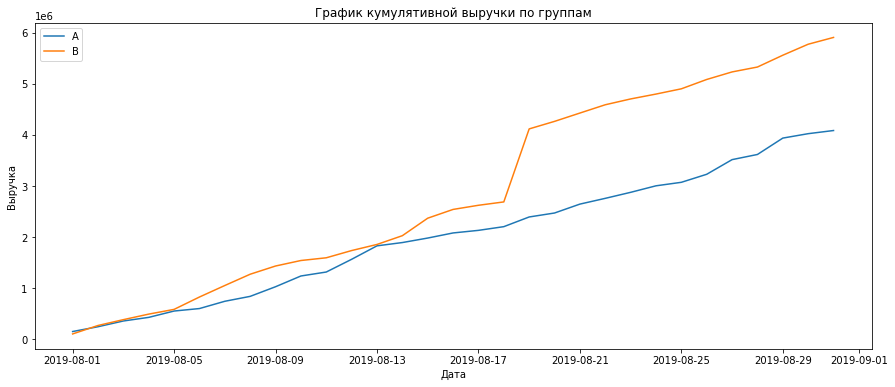

In [ ]:

plt.figure(figsize=(15, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'],
         label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'],
         label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')

plt.legend();

### Вывод

Выручка в течение недели шла примерно на одном уровне в обеих группа. Однако, после 17го числа, выручка в группе В резко выросла. Это может быть связано с каким-либо собитием, или что в данную группу попал кто-то с очень большим заказом

In [ ]:
print('Максимально значение в продажах \n',
      orders.query('revenue >= 200000'))

Максимально значение в продажах 
       transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B


##  Кумулятивный средний чек

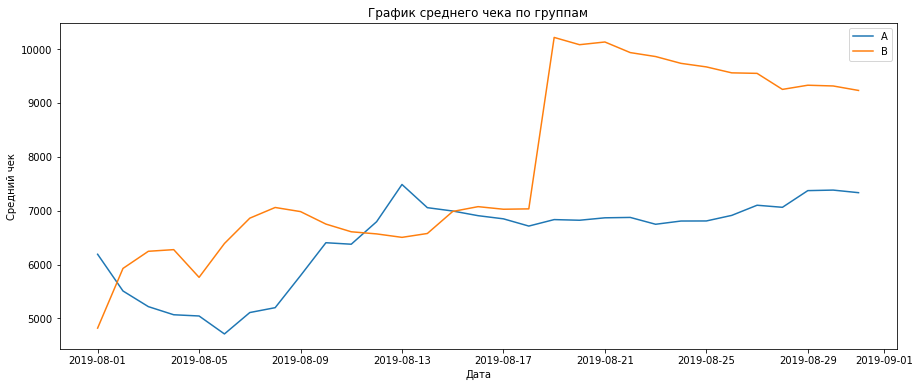

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],
         label='A')
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],
         label='B')

plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('График среднего чека по группам')

plt.legend();





### Вывод

По данным графика видно, просадки чека на 2ой день теста. Потом он выравниется и идет примерно одинаково до конца теста. У группы В есть рост чека в начале, и просадка там, где есть повышение чека у группы А. Это может быть связано с каким-то событием. Но потом, у группы В начинается резкий рост чека. Как и было сказано выше, данное явление обьясняется очень большим заказом.

## Относительное изменение кумулятивного среднего чека группы В к группе А

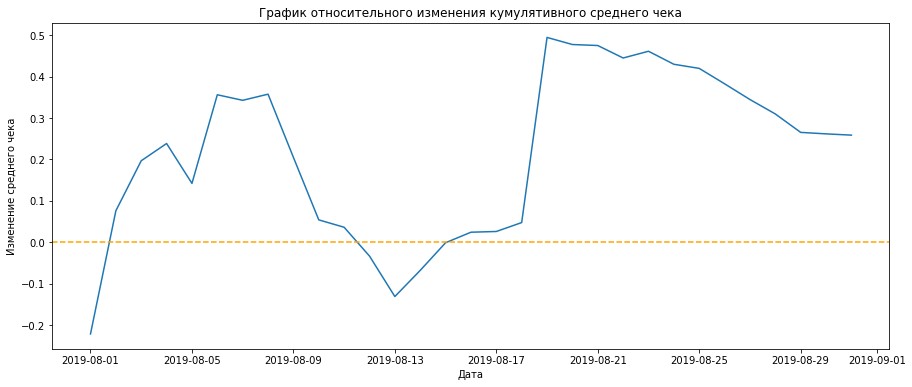

In [ ]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков

plt.figure(figsize=(15, 6))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X

plt.axhline(y=0, color='orange', linestyle='--')

plt.ylabel('Изменение среднего чека')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека')
plt.show()

### Вывод

На графике есть резкие скачки. Это связано с аномалиями в данных.

## График кумулятивного среднего количества заказов на посетителя по группам

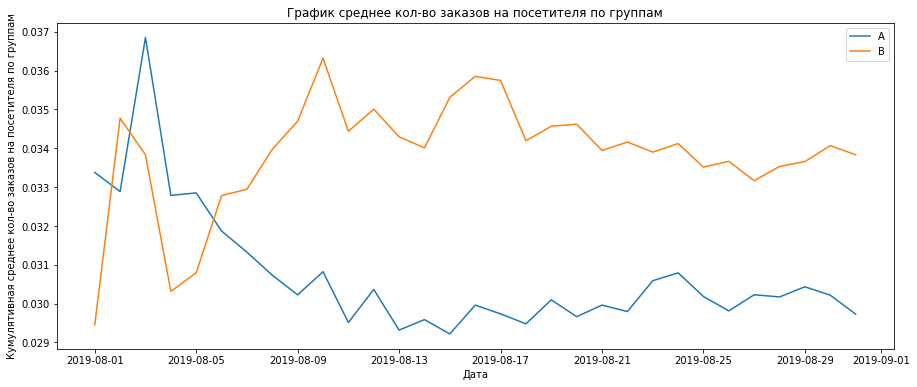

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.figure(figsize=(15, 6))

plt.plot(cumulativeDataA['date'],
         cumulativeDataA['conversion'],
         label='A')
plt.plot(cumulativeDataB['date'],
         cumulativeDataB['conversion'],
         label='B')

plt.legend()

plt.ylabel('Кумулятивная среднее кол-во заказов на посетителя по группам')
plt.xlabel('Дата')
plt.title('График среднее кол-во заказов на посетителя по группам');



### Вывод

Первую неделю, графики идут паралельно. Но после 7.05. конверсия группы В начинает падать, а конверсия группы А расти. И графики идут паралельно.

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

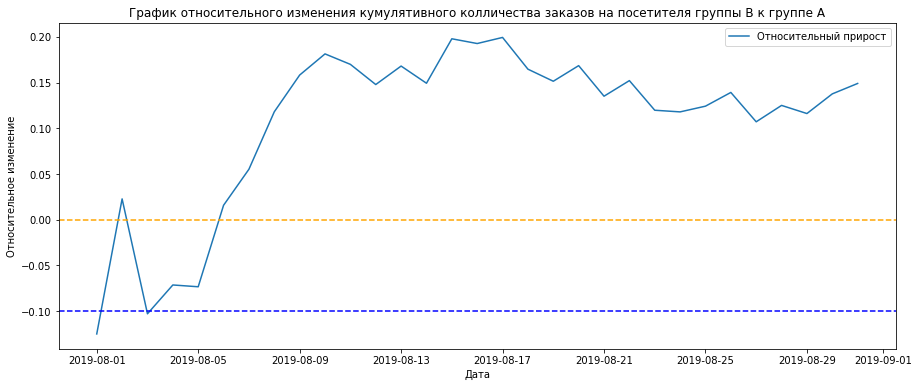

In [ ]:
mergedCumulativeConversions = (cumulativeDataA[['date','orders']]
                               .merge(cumulativeDataB[['date','orders']],
                                      left_on='date',
                                      right_on='date',
                                      how='left',
                                      suffixes=['A', 'B']))

plt.figure(figsize=(15, 6))

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['ordersB']/mergedCumulativeConversions['ordersA']-1,
         label="Относительный прирост")

plt.legend()

plt.axhline(y=0, color='orange',
            linestyle='--')
plt.axhline(y=-0.1, color='blue',
            linestyle='--')

plt.ylabel('Относительное изменение')
plt.xlabel('Дата')

plt.title('График относительного изменения кумулятивного колличества заказов на посетителя группы B к группе A');

### Вывод

В начале теста, группа В отставала от группы А. Однако, после 1й недели резко выросла относительно группы А. Кол-во заказов в групе В было больше, в среднем на 15%.

## График количества заказов по пользователям

In [ ]:
# создадим таблицу с пользователями и их кол-вом заказов.
ordersByUsers = (orders.groupby('visitorId',
                                as_index=False)
                 .agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']

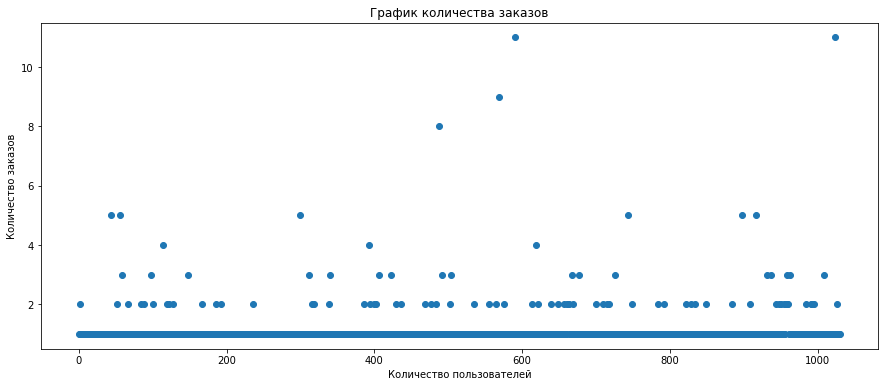

In [ ]:
# построим точечный график
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15, 6))

plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.title('График количества заказов');

### Вывод

По данному графику видно, что основное кол-во заказов приходится на 1ед. товаров на пользователя. Есть те, кто так же покупает и 2ед. А так же можно сказать, штучные выбросы больше 3 заказов.
Кол-во заказав по которым мы будет отсекать выбери 4.

## 95-й и 99-й перцентили количества заказов на пользователя

In [ ]:
print('95-й и 99-й перцентили =',
      np.percentile(ordersByUsers['orders'],
                    [95, 99]))

95-й и 99-й перцентили = [2. 4.]


### Вывод

Пользователей которые оформили заказ больше 3х раз, не более 5 процентов. Из этого можно сделать вывод, что их можно удалить как аномальные значения

## Точечный график стоимостей заказов

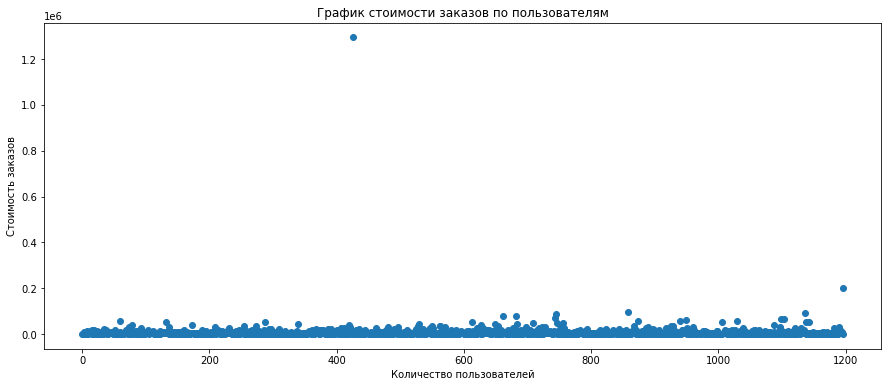

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15, 6))

plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.title('График стоимости заказов по пользователям');

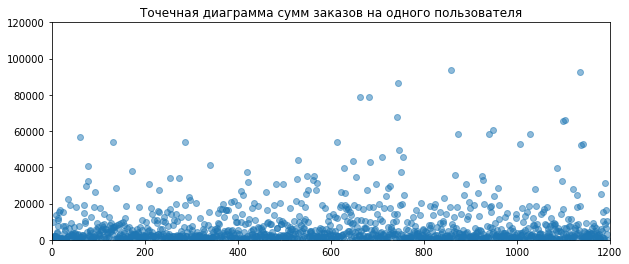

In [ ]:
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'],
            alpha=0.5)

plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 120000])
plt.show()



### Вывод

Видно 2 аномальных значения, которые сильно выбиваются из общей массы. Данные заказы можно смело удалить, чтобы не портили картину.
Так же видно, что в основном, стоимость заказов не превышает 40т. А большество из наших покупок меньше 20т

## 95-й и 99-й перцентили стоимости заказов

In [ ]:
print('95-й и 99-й перцентили =',
      np.percentile(orders['revenue'],
                    [95, 99]))

95-й и 99-й перцентили = [28000.  58233.2]


### Вывод

Меньше 5 процентов пользователей совершают покупаки дорое 28т.
Нижнюю границу для фильтра аномалий выберем 28000 , т.к. все что выше данного числа, входит не больше 5% от всех покупок

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Гипотеза:

   * H0: Статистическая значимость различий в среднем количестве заказов на посетителя в "сырых данных" отсутствует
   * H1: Статистическая значимость различий в среднем количестве заказов на посетителя в "сырых данных" есть



Для проверки гипотез мы применим статистический критерий значимости, который использует теорию вероятностей для оценки вероятности получения результатов, которые мы наблюдаем в наших данных, если наша гипотеза верна.

Мы будем использовать критерий Манна-Уитни для А/В тестирования. Данный критерий позволяет выявлять различия в значении параметра между малыми выборками

Статистическую значимости определим как 5%, т.е. Альфа = 0.05

Если p-value будет меньше 0.05, то значит мы отвергаем нулевую гипотерзу(Н0) в пользу альтернативной(Н1).


Подготовим данные

In [ ]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

print('Количество покупателей группы А: {}'.format(len(ordersByUsersA)))

print('Количество покупок группы А: {}'.format(ordersByUsersA['orders'].sum()))

print('Количество посетителей группы А: {}\n'.format(visits[visits['group']=='A']['visitors'].sum()))

print('Количество покупателей группы В: {}'.format(len(ordersByUsersB)))

print('Количество покупок группы В: {}'.format(ordersByUsersB['orders'].sum()))

print('Количество посетителей группы В: {}'.format(visits[visits['group']=='B']['visitors'].sum()))

Количество покупателей группы А: 503
Количество покупок группы А: 557
Количество посетителей группы А: 18736

Количество покупателей группы В: 586
Количество покупок группы В: 640
Количество посетителей группы В: 18916


In [ ]:
#составим списки кол-ва заказов sampleA и sampleB со всеми пользователями (в том числе и не купившими) по группам
list_orders_1 =[]
for i in range(0,(visits[visits['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visits[visits['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']

In [ ]:
sampleA = pd.concat([ordersByUsersA['transactionId'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['transactionId'], orders_by_non_purchased_users_B], axis=0)

alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)

print('Значение P-value:' ,"{0:.3f}".format(results.pvalue))
print('Относительный прирост кол-ва заказов B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

Значение P-value: 0.017
Относительный прирост кол-ва заказов B по отношению к группе A: 0.138


### Вывод

По «сырым» данным различия в среднем числе заказов групп A и B есть. Относительная разница в пользу группы В = 13%

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Гипотеза:

  * H0: Статистическая значимость различий в среднем чеке заказа между группами в "сырых данных" отсутствует
  * H1: Статистическая значимость различий в среднем чеке заказа между группами  в "сырых данных" есть
    

In [ ]:
print('p-value, ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница величин:' ,'{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1))

p-value,  0.729
Относительная разница величин: 0.259


### Вывод

p-value = 0.729 значит разница не статистически значима. Относительная разница в среднем чеке 25%

## Статистическуая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Гипотеза:

     Н0: Статистическая значимость различий в среднем количестве заказов на посетителя в "очищенных данных" отсутствует
     Н1: Статистическая значимость различий в среднем количестве заказов на посетителя в "очищенных данных" присутствует

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Кол-во аномальных пользователей:',abnormalUsers.shape[0])
print('Относительные потери:', round((abnormalUsers.count()/orders['visitorId'].nunique())* 100, 4))

Кол-во аномальных пользователей: 59
Относительные потери: 5.7226


In [ ]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['transactionId'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['transactionId'],
    orders_by_non_purchased_users_B
], axis = 0)

In [ ]:
print('p-value, ','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница величин:' ,'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value,  0.01846
Относительная разница величин: 0.145


### Вывод

p-value меньше Альфы. Значит мы отвергаем нулевую гипотезу.

Статистическая значимость различий в среднем количестве заказов на посетителя в "очищенных данных" присутствует

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print('p-value, ',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница величин:' ,
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value,  0.961
Относительная разница величин: -0.014


### Вывод

p-value больше альфы, значит нулевую гипотезу не отвергаем. Разница в среднем чеке, в 14%, в пользу группы В. Аномалии довольно сильно исказили информацию о среднем чеке.

# Решение

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Вывод заключается в том, что проведенный A/B-тест был корректным, и мы исключили возможность подглядывания в результаты сравнения групп. Показатели выручки, среднего чека и кол-ва заказов пользователей в группе B лидировали практически все время. Хотя некоторые сомнения возникли из-за резких колебаний в кумулятивном среднем чеке в группе B, очистка данных от аномальных пользователей показала, что разница между средними чеками стала минимальной. Однако, показатель кол-ва заказов пользователей в группе B оставался выше, как до, так и после очистки данных, и разница между группами была статистически значимой. Таким образом, мы можем заключить, что группа B победила, и мы можем остановить наш A/B-тест.

# Общий вывод

Финализируем всю работу.

Фреймоврки для определения приоритета проверки гипотез.

Мы использовали 2 фрейморка: ICE and RICE. Различие их в том, что RICE использует в своих параметрах дополнительный параметр "Охат". А ICE не использует его. Охват мы можем оценить как с помощью наших метрик и данных, которыее есть у нас в компании, т.к. субьектив. В ICE же, все наши параметры субьективны. Из-за этого, RICE считается более точной моделью для приоретизации. И это можно увидеть и в нашем исследование.

Возьмем первую гипотезу по ICE and RICE:
1. ICE:Запустить акцию, дающую скидку на товар в день рождения
2. RICE: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
В ICE наша гипотеза нацелена на узкую аудиторию, но данная гипотеза выигрывает по уверенности, усилиям и затратам. Т.е. она не сложная, по этому она выбивается на первое место. Вопрос в том, какое колличество пользователей увидит данную фичу.
В RICE же выигрывает гипотеза, которая затронет почти всех пользователей, и потенциально, даст больше конверсии.

Про А/B тест:

Были построены графики кумулятивной выручки и кумулятивного среднего чека для групп A и B. Оба графика показывают увеличение показателей со временем, однако график группы B имеет резкий скачок вверх примерно в середине периода.
Также были построены графики относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивной кол-ва заказов на пользователя по группам, и относительного изменения кумулятивной кол-ва заказов на пользователя. В начале теста группы A и B были примерно равными, но затем группа B вырвалась вперед, немного уменьшила конверсию, и стабилизировалась на определенном уровне.
Точечный график количества заказов по пользователям и стоимостей заказов был использован для определения границ аномальных значений. Были посчитаны 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов. Были установлены точные границы для определения пользователей с аномальными значениями: те, у кого заказов больше 3х, и те, чьи покупки стоят более 28000 рублей.
Были также рассчитаны статистические значимости различий в кол-ва заказов на пользователя и среднем чеке заказа между группами по "сырым" и "очищенным" данным. В первом случае, нулевая гипотеза о том, что в среднем чеке различий между группами нет, не была отвергнута, но второй случай группа B была статистически значимо лучше группы A по обеим метрикам. График кол-ва заказов на пользователя также подтверждает фиксацию результатов.
В итоге, тест был остановлен и признан успешным, с установленной статистической значимостью группы B по сравнению с группой A по обеим метрикам.